<a href="https://colab.research.google.com/github/kash-mwangi/kash-mwangi/blob/main/Goal_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd



In [2]:

# Sample data creation with more players
data = {
    'player_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'season': [2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
    'goals': [15, 10, 20, 25, 5, 18, 12, 30, 8, 22],
    'min_played': [2500, 2400, 2600, 2700, 2300, 2500, 2000, 3000, 2100, 2900],
    'assists': [5, 3, 8, 10, 2, 7, 4, 12, 1, 9],
    'shots': [80, 70, 90, 110, 40, 85, 60, 130, 50, 95]
}



In [3]:

# Create DataFrame
df = pd.DataFrame(data)



In [4]:

# Save to CSV
df.to_csv('player_stats.csv', index=False)



In [5]:

# Download the CSV
from google.colab import files
files.download('player_stats.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error




In [7]:

# Load data
data = pd.read_csv('player_stats.csv')



In [8]:
# Display the first few rows of the data
data.head()


,player_id,season,goals,min_played,assists,shots
0,1,2022,15,2500,5,80
1,2,2022,10,2400,3,70
2,3,2022,20,2600,8,90
3,4,2022,25,2700,10,110
4,5,2022,5,2300,2,40


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:

# Check for missing values
print(data.isnull().sum())



player_id     0
season        0
goals         0
min_played    0
assists       0
shots         0
dtype: int64


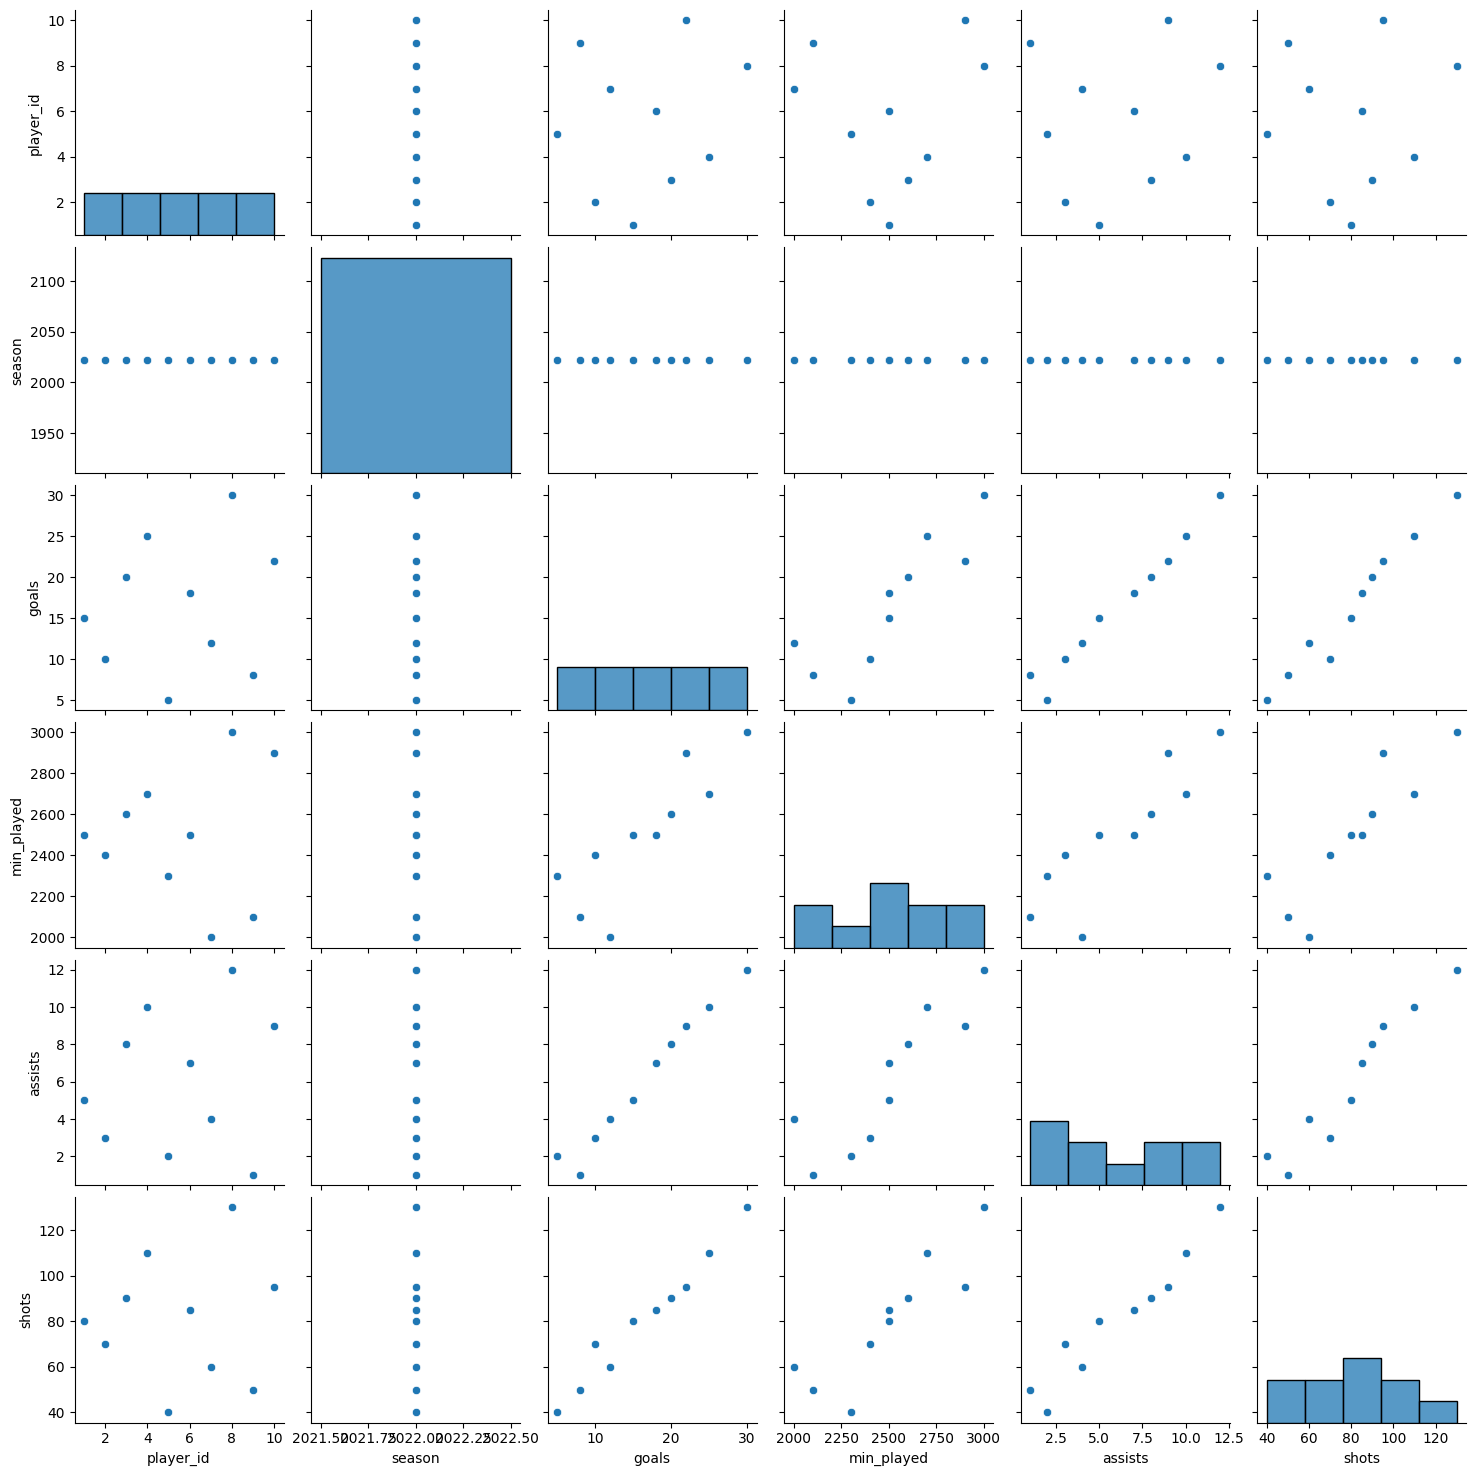

In [11]:


# Visualize the relationship between features and goals
sns.pairplot(data)
plt.show()


In [13]:
# Select features and target variable
features = ['min_played', 'assists', 'shots']  # Add other relevant features
X = data[features]
y = data['goals']


In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)


In [15]:
# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [16]:
# Make predictions
y_pred = model.predict(X_test)



In [17]:


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.08764999999999998


In [18]:
# Example prediction for a new player
new_player_stats = pd.DataFrame({
    'min_played': [2300],
    'assists': [6],
    'shots': [85]
})

predicted_goals = model.predict(new_player_stats)
print(f'Predicted Goals: {predicted_goals[0]}')


Predicted Goals: 14.51
